In [1]:
out = []

s = "x"

out.append(s)
out

['x']

In [2]:
out.append("e")
out

['x', 'e']

In [3]:
''.join(out)

'xe'

In [4]:
import torch

In [5]:
W = torch.randn((27, 1))
W

tensor([[ 0.0147],
        [-0.9614],
        [-0.6302],
        [ 0.3817],
        [-1.3300],
        [ 1.3339],
        [-1.8496],
        [ 0.4199],
        [-0.1827],
        [-0.3539],
        [-0.7269],
        [-0.7979],
        [ 0.6924],
        [-0.3591],
        [ 0.9909],
        [-0.2298],
        [-0.2234],
        [-0.5300],
        [-1.1996],
        [-0.8522],
        [-0.4534],
        [-0.6875],
        [-0.7985],
        [ 0.2492],
        [ 2.7229],
        [-0.4984],
        [-0.8601]])

In [6]:
# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('shake.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [7]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(' '.join(chars))
print(vocab_size)


   ! $ & ' , - . 3 : ; ? A B C D E F G H I J K L M N O P Q R S T U V W X Y Z a b c d e f g h i j k l m n o p q r s t u v w x y z
65


### Tokenizer

In [8]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [9]:
stoi

{'\n': 0,
 ' ': 1,
 '!': 2,
 '$': 3,
 '&': 4,
 "'": 5,
 ',': 6,
 '-': 7,
 '.': 8,
 '3': 9,
 ':': 10,
 ';': 11,
 '?': 12,
 'A': 13,
 'B': 14,
 'C': 15,
 'D': 16,
 'E': 17,
 'F': 18,
 'G': 19,
 'H': 20,
 'I': 21,
 'J': 22,
 'K': 23,
 'L': 24,
 'M': 25,
 'N': 26,
 'O': 27,
 'P': 28,
 'Q': 29,
 'R': 30,
 'S': 31,
 'T': 32,
 'U': 33,
 'V': 34,
 'W': 35,
 'X': 36,
 'Y': 37,
 'Z': 38,
 'a': 39,
 'b': 40,
 'c': 41,
 'd': 42,
 'e': 43,
 'f': 44,
 'g': 45,
 'h': 46,
 'i': 47,
 'j': 48,
 'k': 49,
 'l': 50,
 'm': 51,
 'n': 52,
 'o': 53,
 'p': 54,
 'q': 55,
 'r': 56,
 's': 57,
 't': 58,
 'u': 59,
 'v': 60,
 'w': 61,
 'x': 62,
 'y': 63,
 'z': 64}

In [10]:
itos

{0: '\n',
 1: ' ',
 2: '!',
 3: '$',
 4: '&',
 5: "'",
 6: ',',
 7: '-',
 8: '.',
 9: '3',
 10: ':',
 11: ';',
 12: '?',
 13: 'A',
 14: 'B',
 15: 'C',
 16: 'D',
 17: 'E',
 18: 'F',
 19: 'G',
 20: 'H',
 21: 'I',
 22: 'J',
 23: 'K',
 24: 'L',
 25: 'M',
 26: 'N',
 27: 'O',
 28: 'P',
 29: 'Q',
 30: 'R',
 31: 'S',
 32: 'T',
 33: 'U',
 34: 'V',
 35: 'W',
 36: 'X',
 37: 'Y',
 38: 'Z',
 39: 'a',
 40: 'b',
 41: 'c',
 42: 'd',
 43: 'e',
 44: 'f',
 45: 'g',
 46: 'h',
 47: 'i',
 48: 'j',
 49: 'k',
 50: 'l',
 51: 'm',
 52: 'n',
 53: 'o',
 54: 'p',
 55: 'q',
 56: 'r',
 57: 's',
 58: 't',
 59: 'u',
 60: 'v',
 61: 'w',
 62: 'x',
 63: 'y',
 64: 'z'}

In [11]:
encode('Abracadabra')

[13, 40, 56, 39, 41, 39, 42, 39, 40, 56, 39]

In [12]:
decode(encode('Abracadabra'))

'Abracadabra'

In [13]:
import torch

data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
data[:100]

torch.Size([1115394]) torch.int64


tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59])

In [14]:
# Train and test splits
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [15]:
context_length = 8

train_data[:context_length+1]  # when you sample a chunk of data like this,
train_data

tensor([18, 47, 56,  ..., 43, 56, 43])

In [16]:
x = train_data[:context_length]
y = train_data[1:context_length+1]
for t in range(context_length):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context}, the target: {target}")

when input is tensor([18]), the target: 47
when input is tensor([18, 47]), the target: 56
when input is tensor([18, 47, 56]), the target: 57
when input is tensor([18, 47, 56, 57]), the target: 58
when input is tensor([18, 47, 56, 57, 58]), the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]), the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]), the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]), the target: 58


In [17]:
print(x)
print(y)

tensor([18, 47, 56, 57, 58,  1, 15, 47])
tensor([47, 56, 57, 58,  1, 15, 47, 58])


In [18]:
torch.manual_seed(42)

batch_size = 4 # how many independent sequences will we process in parallel?
context_length = 8 # maximum context for predictions

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - context_length, (batch_size,))  # random offsets
    print(f'index: {ix}')
    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x, y = x, y
    return x, y


xb, yb = get_batch('train')
print('inputs: ')
print(xb.shape)
print(xb)
print('targets: ')
print(yb.shape)
print(yb)

print('------')

for b in range(batch_size):             # batch dimension
    for t in range(context_length):     # time dimension
        context = xb[b, :t+1]
        target = yb[b, t]
        print(f"when input is {context.tolist()} the target: {target}")

index: tensor([476250,  18899, 645194, 831150])
inputs: 
torch.Size([4, 8])
tensor([[57,  1, 46, 47, 57,  1, 50, 53],
        [ 1, 58, 46, 43, 56, 43,  1, 41],
        [17, 26, 15, 17, 10,  0, 32, 53],
        [57, 58,  6,  1, 61, 47, 58, 46]])
targets: 
torch.Size([4, 8])
tensor([[ 1, 46, 47, 57,  1, 50, 53, 60],
        [58, 46, 43, 56, 43,  1, 41, 39],
        [26, 15, 17, 10,  0, 32, 53,  1],
        [58,  6,  1, 61, 47, 58, 46,  0]])
------
when input is [57] the target: 1
when input is [57, 1] the target: 46
when input is [57, 1, 46] the target: 47
when input is [57, 1, 46, 47] the target: 57
when input is [57, 1, 46, 47, 57] the target: 1
when input is [57, 1, 46, 47, 57, 1] the target: 50
when input is [57, 1, 46, 47, 57, 1, 50] the target: 53
when input is [57, 1, 46, 47, 57, 1, 50, 53] the target: 60
when input is [1] the target: 58
when input is [1, 58] the target: 46
when input is [1, 58, 46] the target: 43
when input is [1, 58, 46, 43] the target: 56
when input is [1, 58, 

In [19]:
# our input in the transformer
xb

tensor([[57,  1, 46, 47, 57,  1, 50, 53],
        [ 1, 58, 46, 43, 56, 43,  1, 41],
        [17, 26, 15, 17, 10,  0, 32, 53],
        [57, 58,  6,  1, 61, 47, 58, 46]])

### Simplest model

In [20]:
import torch
import torch.nn as nn
from torch.nn import functional as F

torch.manual_seed(42)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('shake.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)  #
print(' '.join(chars))
print(vocab_size)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()

        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
    
    def forward(self, idx, targets):

        # idx and targets are both (B, T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)  # logits are basically the scores for the next character in the sequence
        # predicting what comes next based on just the individual identity of a single token, currently the tokens are not talking to each other
        return logits


   ! $ & ' , - . 3 : ; ? A B C D E F G H I J K L M N O P Q R S T U V W X Y Z a b c d e f g h i j k l m n o p q r s t u v w x y z
65


In [21]:
m = BigramLanguageModel(vocab_size)
m

BigramLanguageModel(
  (token_embedding_table): Embedding(65, 65)
)

In [22]:
out = m(xb, yb)
print(out.shape)
out

torch.Size([4, 8, 65])


tensor([[[ 0.4224, -0.8596,  0.2910,  ...,  0.2380, -0.1270,  0.0534],
         [ 0.8564,  2.2181,  0.5232,  ...,  0.4114,  1.9312,  1.0119],
         [ 0.4851,  0.0060,  1.0007,  ..., -0.0776, -0.5015, -2.2270],
         ...,
         [ 0.8564,  2.2181,  0.5232,  ...,  0.4114,  1.9312,  1.0119],
         [-0.3991, -0.5458, -0.9493,  ...,  0.0233, -1.0358,  0.6917],
         [ 1.9442,  1.1369, -0.9768,  ...,  0.4025,  1.5574,  2.0379]],

        [[ 0.8564,  2.2181,  0.5232,  ...,  0.4114,  1.9312,  1.0119],
         [ 1.0923, -1.3024,  1.3521,  ..., -0.2658, -1.4075, -0.7460],
         [ 0.4851,  0.0060,  1.0007,  ..., -0.0776, -0.5015, -2.2270],
         ...,
         [ 0.0210, -0.0545, -0.8116,  ...,  1.2781,  0.3526, -0.0750],
         [ 0.8564,  2.2181,  0.5232,  ...,  0.4114,  1.9312,  1.0119],
         [ 0.2751,  0.4683, -0.7030,  ...,  0.1575, -1.1567,  1.8156]],

        [[ 1.3978, -0.9167, -0.7794,  ..., -0.5841,  0.1061, -0.3067],
         [ 1.5735,  1.8697, -1.0639,  ...,  1

In [24]:
class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()

        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
    
    def forward(self, idx, targets):

        # idx and targets are both (B, T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)  # logits are basically the scores for the next character in the sequence
        
        loss = F.cross_entropy(logits, targets) # measures quality of the logits with respect to the targets; we have the identity of the next char, how well we are predicting the next char

        return logits

In [25]:
m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)

RuntimeError: Expected target size [4, 65], got [4, 8]

In [29]:
# crossentropy wants a B, C, T

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()

        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
    
    def forward(self, idx, targets):

        # idx and targets are both (B, T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)  # logits are basically the scores for the next character in the sequence
        print(f"logits shape before reshaping: {logits.shape}")

        # reshape the logits
        B, T, C = logits.shape
        logits = logits.view(B*T, C) # from 3D to 2D to conform to the cross_entropy expected dims
        print(f"logits shape after reshaping: {logits.shape}")

        # reshape the targets
        print(f"targets shape before reshaping: {targets.shape}")
        targets = targets.view(B*T)
        print(f"targets shape after reshaping: {targets.shape}")
        
        loss = F.cross_entropy(logits, targets) # measures quality of the logits with respect to the targets; we have the identity of the next char, how well we are predicting the next char

        return logits, loss

In [32]:
m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(f'loss: {loss}')

logits shape before reshaping: torch.Size([4, 8, 65])
logits shape after reshaping: torch.Size([32, 65])
targets shape before reshaping: torch.Size([4, 8])
targets shape after reshaping: torch.Size([32])
loss: 4.5403618812561035


In [ ]:
# we are expecting loss to be ln(1/65) = 4.174387
# our loss telling us that the initial predictions are not super diffuse, it got a little bit of entropy and
# we're guessing wrong

In [47]:
# now to inference

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()

        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
    
    def forward(self, idx, targets=None):

        # idx and targets are both (B, T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)  # logits are basically the scores for the next character in the sequence

        if targets is None:
            loss = None
        
        else:
            # reshape the logits
            B, T, C = logits.shape
            logits = logits.view(B*T, C) # from 3D to 2D to conform to the cross_entropy expected dims

            # reshape the targets
            targets = targets.view(B*T)
            
            loss = F.cross_entropy(logits, targets) # measures quality of the logits with respect to the targets; we have the identity of the next char, how well we are predicting the next char

        return logits, loss
    
    def generate(self, idx, max_new_tokens):
        # idx is (B,T) array of indices in the current context

        for _ in range(max_new_tokens):

            # get the predictions
            logits, loss = self(idx)
            #print(self(idx))
            #print(f"logits shape: {logits}")
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B,C), getting the last element of the Time dimension
            #print(f"logits reshape: {logits}")
            # aply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B,C)

            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)

            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
            #print(f"idx catted: {idx}")
        
        return idx


In [48]:
m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(f'loss: {loss}')

loss: 4.843300819396973


In [49]:
# currently we are feeding in the whole ammount of characters to predict the next char given a current one, but we'll see next why
# the output is garbage, because the model is untrained.

idxs = torch.zeros((1, 1), dtype=torch.long) # kickoff the generation, using 0's as the starting point for generation
decode(m.generate(idxs, max_new_tokens=100)[0].tolist())

'\nmGEE\nNa,K-OmZLpwYw-tJZ.\n;H,!axi.sZRBHYMS&T,H,XiiRVFNPx;YVgB3,Jzu&TZl!M;nXnhCtzduoG&pCFPXwzqi.dgwCiJS'

### Training

In [53]:
m.parameters

<bound method Module.parameters of BigramLanguageModel(
  (token_embedding_table): Embedding(65, 65)
)>

In [50]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [54]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - context_length, (batch_size,))  # random offsets

    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x, y = x, y
    
    return x, y

In [56]:
batch_size = 32
for steps in range(100):

    # sample a batch of data
    xb, yb = get_batch('train')

    # eval loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    print(loss.item())

4.773728847503662
4.717329025268555
4.752090930938721
4.745761394500732
4.749935150146484
4.687955856323242
4.764248847961426
4.6521406173706055
4.847356796264648
4.765072822570801
4.861966609954834
4.713894844055176
4.743587017059326
4.787214756011963
4.890217304229736
4.771665573120117
4.788496971130371
4.720020294189453
4.7808518409729
4.780531406402588
4.748926162719727
4.755062580108643
4.739818096160889
4.767740249633789
4.836137294769287
4.769327640533447
4.730599403381348
4.608950138092041
4.658009052276611
4.706156253814697
4.67409086227417
4.744751930236816
4.764608383178711
4.753079891204834
4.777052879333496
4.726086616516113
4.663741588592529
4.662285804748535
4.771123886108398
4.677136421203613
4.663066864013672
4.7853007316589355
4.643113136291504
4.717190742492676
4.691463947296143
4.647490978240967
4.676192760467529
4.690550804138184
4.696704387664795
4.730293273925781
4.725594997406006
4.598396301269531
4.8454508781433105
4.580946922302246
4.748536109924316
4.71146297

In [58]:
batch_size = 32
for steps in range(10000):

    # sample a batch of data
    xb, yb = get_batch('train')

    # eval loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())

2.387174129486084


In [61]:
idxs = torch.zeros((1, 1), dtype=torch.long) # kickoff the generation, using 0's as the starting point for generation
print(decode(m.generate(idxs, max_new_tokens=500)[0].tolist()))


Fowigs:
LAnded therdstZMyoon Wisemand shorot bed he iveem?
SVINe h amad.
Tabe esemonerlarthardr o pr pis haire merd ror,
BORDY geronds trorldghe sh wamalandangl at, miscous d s
BEDre te bullaret.
S:

ARI e
LL:
By l berewhithefowe
Fo ts;
M3he's ad havetofaprears om le!

s ru mere pthofu:

MINoulear, ulis brell a trunoust.
Shtind:
Mad,
Bu IAThe.
Tr toss m tin,byre d, I o s Whrn out:
An:
AP ppe, my.
n! orese s anowfowk.
NERURit y de.
HULAndee weriehidistoturu be:
FI it oshotomexom beasct ruk'd, 'do


## Towards attention

In [62]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 32 # how many independent sequences will we process in parallel?
context_length = 8 # what is the maximum context length for predictions?
max_iters = 3000
eval_interval = 300
learning_rate = 1e-2
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
# ------------

torch.manual_seed(1337)

In [63]:
# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('shake.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [64]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)

# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [65]:
# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [66]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - context_length, (batch_size,))
    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [67]:
# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [68]:
model = BigramLanguageModel(vocab_size)
m = model.to(device)

In [69]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [70]:
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

step 0: train loss 4.7305, val loss 4.7241
step 300: train loss 2.8110, val loss 2.8249
step 600: train loss 2.5434, val loss 2.5682
step 900: train loss 2.4932, val loss 2.5088
step 1200: train loss 2.4863, val loss 2.5035
step 1500: train loss 2.4665, val loss 2.4921
step 1800: train loss 2.4683, val loss 2.4936
step 2100: train loss 2.4696, val loss 2.4846
step 2400: train loss 2.4638, val loss 2.4879
step 2700: train loss 2.4738, val loss 2.4911


In [71]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=500)[0].tolist()))




CEThik brid owindakis b, bth

HAPet bobe d e.
S:
O:3 my d?
LUCous:
Wanthar u qur, t.
War dXENDoate awice my.

Hastarom oroup
Yowhthetof isth ble mil ndill, ath iree sengmin lat Heriliovets, and Win nghir.
Swanousel lind me l.
HAshe ce hiry:
Supr aisspllw y.
Hentofu n Boopetelaves
MPOLI s, d mothakleo Windo whth eisbyo the m dourive we higend t so mower; te

AN ad nterupt f s ar igr t m:

Thin maleronth,
Mad
RD:

WISo myrangoube!
KENob&y, wardsal thes ghesthinin couk ay aney IOUSts I&fr y ce.
J


## Self-Attention mathematical trick

In [72]:
# toy example

torch.manual_seed(1337)

B,T,C = 4,8,2 # batch, time (tokens), channels (some information for each token)

x = torch.randn(B,T,C) 
x.shape

torch.Size([4, 8, 2])

we want to implement the decoder only part of transformer, where we use a trick to ignore the future tokens
the encoder part doesn't use this trick

In [73]:
# for every single batch element, independently for every T-th token in that sequence, 
# calculate the average of all the vectors in all the previous tokens and also at this token 

# we want x[b, t] = mean_{i<=t} x[b, i]

# Version 1: Unvectorized version
xbow = torch.zeros((B,T,C)) # bag of words

for b in range(B):
    for t in range(T):
        xprev = x[b, :t+1] # (t,C)
        xbow[b, t] = torch.mean(xprev, 0)

In [74]:
x[0]

tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433]])

In [75]:
xbow[0]
"""
first rows are equal, but the secodn row is the average of the first and second row and then the third row is the average of the first, second and third row of x and so on

tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])   # this last row is the average of all rows of x

        
"""


tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])

In [76]:
# Version 2: matrix multiplication (more efficient)

torch.manual_seed(42)
a = torch.ones(3, 3)
b = torch.randint(0, 10, (3,2)).float()
c = a @ b

print('a =')
print(a)
print('---')
print('b =')
print(b)
print('---')
print('c =')
print(c)
print('---')


a =
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
---
b =
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
---
c =
tensor([[14., 16.],
        [14., 16.],
        [14., 16.]])
---


In [77]:
torch.tril(torch.ones(3, 3))

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

In [78]:
# we are now getting the sum of the current and previous rows in c matrix
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
b = torch.randint(0, 10, (3,2)).float()
c = a @ b

print('a =')
print(a)
print('---')
print('b =')
print(b)
print('---')
print('c =')
print(c)
print('---')

a =
tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])
---
b =
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
---
c =
tensor([[ 2.,  7.],
        [ 8., 11.],
        [14., 16.]])
---


In [90]:
# we are now getting the average of the current and previous rows in c matrix
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0, 10, (3,2)).float()
c = a @ b

print('a =')
print(a)
print('---')
print('b =')
print(b)
print('---')
print('c =')
print(c)
print('---')

a =
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
---
b =
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
---
c =
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])
---


In [91]:
weights = torch.tril(torch.ones(T, T))
weights = weights / weights.sum(1, keepdim=True)
weights # each row sums to 1

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [93]:
torch.manual_seed(1337)

B,T,C = 4,8,2 # batch, time (tokens), channels (some information for each token)

x = torch.randn(B,T,C) 

weights = torch.tril(torch.ones(T, T))
weights = weights / weights.sum(1, keepdim=True)
weights # each row sums to 1

xbow_ver2 = weights @ x # (B, T, T) @ (B, T C) --> (B, T, C)
xbow_ver2

tensor([[[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]],

        [[ 1.3488, -0.1396],
         [ 0.8173,  0.4127],
         [-0.1342,  0.4395],
         [ 0.2711,  0.4774],
         [ 0.2421,  0.0694],
         [ 0.0084,  0.0020],
         [ 0.0712, -0.1128],
         [ 0.2527,  0.2149]],

        [[-0.6631, -0.2513],
         [ 0.1735, -0.0649],
         [ 0.1685,  0.3348],
         [-0.1621,  0.1765],
         [-0.2312, -0.0436],
         [-0.1015, -0.2855],
         [-0.2593, -0.1630],
         [-0.3015, -0.2293]],

        [[ 1.6455, -0.8030],
         [ 1.4985, -0.5395],
         [ 0.4954,  0.3420],
         [ 1.0623, -0.1802],
         [ 1.1401, -0.4462],
         [ 1.0870, -0.4071],
         [ 1.0430, -0.1299],
         [ 1.1138, -0.1641]]])

In [94]:
# version 3: Using Softmax

torch.manual_seed(1337)

B,T,C = 4,8,2 # batch, time (tokens), channels (some information for each token)

x = torch.randn(B,T,C) 

tril = torch.tril(torch.ones(T, T))

weights = torch.zeros((T, T))
weights = weights.masked_fill(tril == 0, float('-inf')) # for all elements where tril is equal to 0, make them -inf
weights = F.softmax(weights, dim=-1)
weights # each row sums to 1

xbow_ver3 = weights @ x # (B, T, T) @ (B, T C) --> (B, T, C)
xbow_ver3

tensor([[[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]],

        [[ 1.3488, -0.1396],
         [ 0.8173,  0.4127],
         [-0.1342,  0.4395],
         [ 0.2711,  0.4774],
         [ 0.2421,  0.0694],
         [ 0.0084,  0.0020],
         [ 0.0712, -0.1128],
         [ 0.2527,  0.2149]],

        [[-0.6631, -0.2513],
         [ 0.1735, -0.0649],
         [ 0.1685,  0.3348],
         [-0.1621,  0.1765],
         [-0.2312, -0.0436],
         [-0.1015, -0.2855],
         [-0.2593, -0.1630],
         [-0.3015, -0.2293]],

        [[ 1.6455, -0.8030],
         [ 1.4985, -0.5395],
         [ 0.4954,  0.3420],
         [ 1.0623, -0.1802],
         [ 1.1401, -0.4462],
         [ 1.0870, -0.4071],
         [ 1.0430, -0.1299],
         [ 1.1138, -0.1641]]])

In [96]:
weights = torch.zeros((T, T))
weights

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [97]:
weights = weights.masked_fill(tril == 0, float('-inf')) # for all elements where tril is equal to 0, make them -inf
weights

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [98]:
weights = F.softmax(weights, dim=-1) # normalization operation
weights

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [ ]:
# the reason we use softmax
# basically long story short from this entire section is that you can do weighted aggregations of your past elements
# by having by using matrix multiplication of a lower triangular fashion
# and then the elements here in the lower triangular part are telling you how much of each element fuses into this position
# we're going to use this trick to develop the self-attention block

torch.manual_seed(1337)

B,T,C = 4,8,2 # batch, time (tokens), channels (some information for each token)

x = torch.randn(B,T,C) 

tril = torch.tril(torch.ones(T, T))

weights = torch.zeros((T, T)) # these will be data dependent, currently set at zeros but these will be something else
weights = weights.masked_fill(tril == 0, float('-inf')) # tokens from the past cannot communicate with tokens from the future
weights = F.softmax(weights, dim=-1)
weights # each row sums to 1

xbow_ver3 = weights @ x # (B, T, T) @ (B, T C) --> (B, T, C)
xbow_ver3

In [ ]:
# version 4: Self-Attention!

# every single token aka Node, will emit 2 vectors!
# these 2 vectors are named: Query and Key

# Query - What am I looking for?
# Key - What do I contain ?

# affinity - a close similarity between two things

# the way we get affinities between tokens now is that we basically do a dot product between my query and all the keys of all the other tokens
# and that product becomes the weights

In [15]:
# let's implement a single head of the self-attention

torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time (tokens), channels (some information for each token)
x = torch.randn(B,T,C) 

head_size = 16 # hyperparameter

key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
print(key)
print(query)

Linear(in_features=2, out_features=16, bias=False)
Linear(in_features=2, out_features=16, bias=False)


In [17]:
# all the positions in the B by T arrangement, all of them in parallel and independently produce a key and a query
k = key(x) # (B, T, 16)
q = query(x) # (B, T, 16)
print(k.shape)
print(q.shape)


torch.Size([4, 8, 16])
torch.Size([4, 8, 16])


In [28]:
weights = q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) --> (B, T, T) we need to transpose the last two dimensions

In [29]:
print(weights.shape)
weights[0] # the raw affinities between all the nodes

torch.Size([4, 8, 8])


tensor([[ 0.0518, -0.1272,  0.1856,  0.2836,  0.1334, -0.4107,  0.0643, -0.2371],
        [-0.0279, -0.2687, -0.0142, -0.0138,  0.3463, -0.1093, -0.0820,  0.5069],
        [ 0.1603, -0.3077,  0.5522,  0.8420,  0.3064, -1.1863,  0.2109, -0.8297],
        [ 0.2428, -0.4568,  0.8337,  1.2711,  0.4526, -1.7872,  0.3205, -1.2664],
        [ 0.0102,  0.3930, -0.0695, -0.1160, -0.4921,  0.3284,  0.0716, -0.5174],
        [-0.3134,  0.4386, -1.0379, -1.5788, -0.3969,  2.1592, -0.4351,  1.8049],
        [ 0.0783, -0.2394,  0.2922,  0.4477,  0.2602, -0.6664,  0.0904, -0.3045],
        [-0.3488,  1.2351, -1.3450, -2.0646, -1.3681,  3.1349, -0.3791,  1.1684]],
       grad_fn=<SelectBackward0>)

In [30]:
tril = torch.tril(torch.ones(T, T))
weights = weights.masked_fill(tril == 0, float('-inf'))
weights[0]

tensor([[ 0.0518,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf],
        [-0.0279, -0.2687,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf],
        [ 0.1603, -0.3077,  0.5522,    -inf,    -inf,    -inf,    -inf,    -inf],
        [ 0.2428, -0.4568,  0.8337,  1.2711,    -inf,    -inf,    -inf,    -inf],
        [ 0.0102,  0.3930, -0.0695, -0.1160, -0.4921,    -inf,    -inf,    -inf],
        [-0.3134,  0.4386, -1.0379, -1.5788, -0.3969,  2.1592,    -inf,    -inf],
        [ 0.0783, -0.2394,  0.2922,  0.4477,  0.2602, -0.6664,  0.0904,    -inf],
        [-0.3488,  1.2351, -1.3450, -2.0646, -1.3681,  3.1349, -0.3791,  1.1684]],
       grad_fn=<SelectBackward0>)

In [31]:
weights = F.softmax(weights, dim=-1)
weights[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5599, 0.4401, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3220, 0.2016, 0.4764, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1640, 0.0815, 0.2961, 0.4585, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2051, 0.3007, 0.1894, 0.1808, 0.1241, 0.0000, 0.0000, 0.0000],
        [0.0600, 0.1273, 0.0291, 0.0169, 0.0552, 0.7114, 0.0000, 0.0000],
        [0.1408, 0.1025, 0.1744, 0.2038, 0.1690, 0.0669, 0.1426, 0.0000],
        [0.0223, 0.1086, 0.0082, 0.0040, 0.0080, 0.7257, 0.0216, 0.1016]],
       grad_fn=<SelectBackward0>)

In [32]:
tril = torch.tril(torch.ones(T, T))

weights = q @ k.transpose(-2, -1) 
weights = weights.masked_fill(tril == 0, float('-inf')) # tokens from the past cannot communicate with tokens from the future
weights = F.softmax(weights, dim=-1)

xbow_ver4 = weights @ x # (B, T, T) @ (B, T C) --> (B, T, C)
xbow_ver4

tensor([[[ 0.1808, -0.0700],
         [-0.0570, -0.4420],
         [ 0.2838, -0.1949],
         [ 0.6233, -0.0490],
         [ 0.2648, -0.1282],
         [-0.9410, -0.4174],
         [ 0.2966,  0.0429],
         [-1.0912, -0.3098]],

        [[ 1.3488, -0.1396],
         [ 0.8847,  0.3427],
         [-2.0357,  0.4934],
         [ 1.3597,  0.2821],
         [ 1.1329,  0.3595],
         [-1.7332,  0.2990],
         [ 1.0409,  0.1609],
         [ 0.6918, -0.4466]],

        [[-0.6631, -0.2513],
         [ 0.8573,  0.0875],
         [-0.0630,  0.1579],
         [-0.8341, -0.1363],
         [-0.2826,  0.0441],
         [ 0.6116,  0.1218],
         [-0.9736, -0.0473],
         [-0.5590, -0.0777]],

        [[ 1.6455, -0.8030],
         [ 1.5390, -0.6121],
         [-1.5087,  2.1029],
         [ 2.7514, -1.7361],
         [ 2.6228, -1.6393],
         [ 2.1907, -1.3343],
         [ 1.8340, -1.0678],
         [ 2.5275, -1.5344]]], grad_fn=<UnsafeViewBackward0>)

In [24]:
weights[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5599, 0.4401, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3220, 0.2016, 0.4764, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1640, 0.0815, 0.2961, 0.4585, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2051, 0.3007, 0.1894, 0.1808, 0.1241, 0.0000, 0.0000, 0.0000],
        [0.0600, 0.1273, 0.0291, 0.0169, 0.0552, 0.7114, 0.0000, 0.0000],
        [0.1408, 0.1025, 0.1744, 0.2038, 0.1690, 0.0669, 0.1426, 0.0000],
        [0.0223, 0.1086, 0.0082, 0.0040, 0.0080, 0.7257, 0.0216, 0.1016]],
       grad_fn=<SelectBackward0>)

### Self Attention

In [2]:
torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time (tokens), channels (some information for each token)
x = torch.randn(B,T,C) 

head_size = 16 # hyperparameter

key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)

# all the positions in the B by T arrangement, all of them in parallel and independently produce a key and a query
k = key(x) # (B, T, 16)
q = query(x) # (B, T, 16)

weights = q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) --> (B, T, T) we need to transpose the last two dimensions

tril = torch.tril(torch.ones(T, T))

weights = q @ k.transpose(-2, -1) 
weights = weights.masked_fill(tril == 0, float('-inf')) # tokens from the past cannot communicate with tokens from the future
weights = F.softmax(weights, dim=-1)

v = value(x) # you can think of x as kind of like a private information to this token
# now for the purposes of the single head here's what I'm interested in
# here's what I have and if you find me interesting 
# here's what I will communicate to you and
# that's stored in v

# xbow_ver4 = weights @ x # (B, T, T) @ (B, T C) --> (B, T, C)
out = weights @ v  # v is the thing that gets aggregated for the purposes of this single head between the different nodes

In [34]:
out.shape

torch.Size([4, 8, 16])

In [ ]:
# Note 1: 
# - Attention is a communication mechanism. Can be seen as nodes in a directed graph looking at each other and aggregating information
# with a weighted sum from all nodes that point to them, with data dependent weights.


# our graph has a different structure we have eight nodes because the block size is eight 
# and there's always eight tokens and the first node is only pointed to by itself 
# the second node is pointed to by the first node and itself 
# all the way up to the eighth node which is pointed to by all the previous nodes and itself 
# and so that's the structure that our directed graph has or happens happens to have in other aggressive sort of scenario 
# like language modeling but in principle attention can be applied to any arbitrary directed graph and it's just a communication mechanism between the nodes

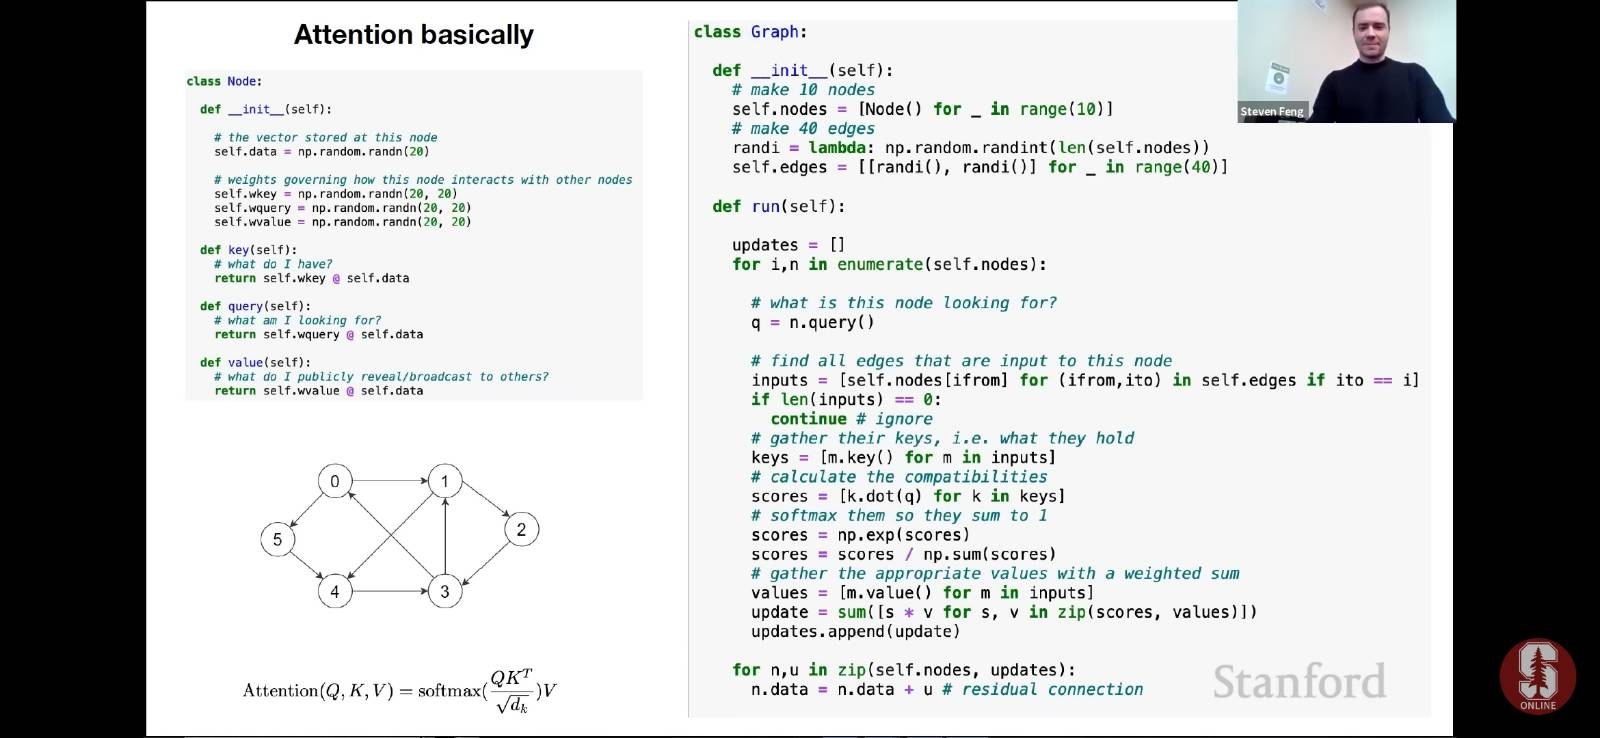

In [35]:
from PIL import Image
from IPython.display import display

img = Image.open('karpathy_nodes_edges.jpeg')

display(img)

In [ ]:
# Note 2:
# - Attention has no notion of space, but operates over a set of vectors. This is why we need to positionally encode tokens.

# These nodes have no idea where they are positioned in space, that's why we need to encode them positionally and sort of give them some information that is anchored to a specific position
# so that they sort of know where they are

# the difference between this and Convolutional NN's 
# In a convolution operation over some input, there's veryu specific sort of layout of the information in space (CNN fiklters sor of act in space)

# in attention is just a set of vectors out there in space they communicate and if you want them to have
# a notion of space you need to specifically add it which is what we've done when we calculated the relative position
# the position encodings and added that information to the vectors


In [ ]:
# Note 3:
# - Each example across batch dimension is of course processed completly independently and never "talk" to each other
# we have 4 separate pools of 8 nodes, so 32 nodes are processed at time, but only each pool communicates.

In [ ]:
# Note 4:
# - "Self-Attention" just means that the keys and values are produced from the same source as queries. In "cross-attention" the queries still
# get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)

In [ ]:
# Note 5:
# In an "encoder" attention block, just delete the single line that does masking with tril, allowing all tokens to communicate.
# In our above attention example, we have a "decoder" attention block, because it has triangular masking, and is usually used in autoregressive settings, like language modeling

# but this doesn't necessarily have to be the constraint in the general case
# in fact, in many cases you may want to have all of the nodes talk to each other fully 
# so as an example if you're doing sentiment analysis or something like that with a Transformer
# you might have a number of tokens and you may want to have them all talk to each other fully 
# because later you are predicting for example the sentiment of the sentence and so it's okay for these nodes to talk to each other 
# and so in those cases you will use an encoder block of self-attention

In [ ]:
# Note 6:
# "Scaled" attention additional divides weights by 1/sqrt(head_size). 
# This makes it so when input Q, K are unit variance, weight will be unit variance too, and Softmax will stay diffuse and not saturate too much.
# see illustration below

In [3]:
k = torch.randn(B, T, head_size)
q = torch.randn(B, T, head_size)

In [4]:
wei = q @ k.transpose(-2, -1)

In [5]:
k.var()

tensor(1.1016)

In [6]:
q.var()

tensor(1.0290)

In [7]:
wei.var()

tensor(16.8750)

In [8]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5]), dim=-1)

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

In [9]:
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [10]:
wei.var()

tensor(1.0547)

## Rewrite

In [18]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 32 # how many independent sequences will we process in parallel?
context_length = 8 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
number_embeddings = 32
# ------------

torch.manual_seed(1337)

In [19]:
# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('shake.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [20]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)

# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [21]:
# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [22]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - context_length, (batch_size,))
    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [23]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(number_embeddings, head_size, bias=False)
        self.query = nn.Linear(number_embeddings, head_size, bias=False)
        self.value = nn.Linear(number_embeddings, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(context_length, context_length))) # this is called a buffer, it's not a parameter, and if you have to call it, you have to assign it to the module using a register buffer


    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)

        # compute attention scores ("affinities")
        # we use scaled attention here
        weights = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T) 

        # ensure it doesn't communicate with the past - decoder attention
        weights = weights.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)

        weights = F.softmax(weights, dim=-1) # (B, T, T)

        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)

        # the output
        out = weights @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        
        return out

In [24]:
# simple implementation to plug the self attention into our model

class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, number_embeddings)
        self.position_embedding_table = nn.Embedding(context_length, number_embeddings)
        self.sa_head = Head(number_embeddings)
        self.lm_head = nn.Linear(number_embeddings, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        token_embeddings = self.token_embedding_table(idx) # (B,T,C)
        position_embeddings = self.position_embedding_table(torch.arange(T, device=device))  # (T, C) from 0 to t-1

        x = token_embeddings + position_embeddings # (B,T,C)

        # apply one head of attention
        x = self.sa_head(x)  

        logits = self.lm_head(x) # (B,T, vocab_size)


        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the lastcontext_length tokens
            idx_cond = idx[:, -context_length:]

            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [25]:
model = BigramLanguageModel()
m = model.to(device)

In [26]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [27]:
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

step 0: train loss 4.2000, val loss 4.2047
step 500: train loss 2.6911, val loss 2.7087
step 1000: train loss 2.5196, val loss 2.5303
step 1500: train loss 2.4775, val loss 2.4829
step 2000: train loss 2.4408, val loss 2.4523
step 2500: train loss 2.4272, val loss 2.4435
step 3000: train loss 2.4130, val loss 2.4327
step 3500: train loss 2.3956, val loss 2.4212
step 4000: train loss 2.4041, val loss 2.3992
step 4500: train loss 2.3980, val loss 2.4084


In [28]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=400)[0].tolist()))


Whent iknt,
Thowi, ht son, bth

Hiset bobe ale.
S:
O-' st dalilanss:
Want he us he, vet?
Wedilas ate awice my.

HDET:
ANGo oug
Yowhavetof is he ot mil ndill, aes iree sen cie lat Herid ovets, and Win ngarigoerabous lelind peal.
-hule onchiry ptugr aiss hew ye wllinde norod atelaves
Momy yowod mothake ont-wou whth eiiby we ati dourive wee, ired thoouso er; th
To kad nteruptef so;
ARID Wam:
ENGCI in


## Multi-Head Attention

In [ ]:
# applying multiple attentions in parallel and concatenating the results

In [29]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 32 # how many independent sequences will we process in parallel?
context_length = 8 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
number_embeddings = 32
# ------------

torch.manual_seed(1337)

In [30]:
# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('shake.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [31]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)

# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [32]:
# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [33]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - context_length, (batch_size,))
    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [34]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(number_embeddings, head_size, bias=False)
        self.query = nn.Linear(number_embeddings, head_size, bias=False)
        self.value = nn.Linear(number_embeddings, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(context_length, context_length))) # this is called a buffer, it's not a parameter, and if you have to call it, you have to assign it to the module using a register buffer


    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)

        # compute attention scores ("affinities")
        # we use scaled attention here
        weights = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T) 

        # ensure it doesn't communicate with the past - decoder attention
        weights = weights.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)

        weights = F.softmax(weights, dim=-1) # (B, T, T)

        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)

        # the output
        out = weights @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        
        return out

In [35]:
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(number_embeddings, number_embeddings)


    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1) # concat on the C dim

        return out

In [36]:
# simple implementation to plug the self attention into our model

class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, number_embeddings)
        self.position_embedding_table = nn.Embedding(context_length, number_embeddings)

        # because we have four communication channels we want eight dimensional self-attention 
        # and from each communication channel we're going to gather eight dimensional vectors 
        # and then we have four of them and that concatenates to give us 32, which is the original number_embeddings size
        self.sa_heads = MultiHeadAttention(4, number_embeddings//4) # i.e 4 heads of 8-dimensional self-attention
        self.lm_head = nn.Linear(number_embeddings, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        token_embeddings = self.token_embedding_table(idx) # (B,T,C)
        position_embeddings = self.position_embedding_table(torch.arange(T, device=device))  # (T, C) from 0 to t-1

        x = token_embeddings + position_embeddings # (B,T,C)

        # apply heads of attention
        x = self.sa_heads(x)  

        logits = self.lm_head(x) # (B,T, vocab_size)


        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the lastcontext_length tokens
            idx_cond = idx[:, -context_length:]

            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [37]:
model = BigramLanguageModel()
m = model.to(device)

In [38]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [39]:
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

step 0: train loss 4.2533, val loss 4.2552
step 500: train loss 2.6406, val loss 2.6593
step 1000: train loss 2.4890, val loss 2.4925
step 1500: train loss 2.4175, val loss 2.4158
step 2000: train loss 2.3506, val loss 2.3700
step 2500: train loss 2.3226, val loss 2.3445
step 3000: train loss 2.3080, val loss 2.3265
step 3500: train loss 2.2773, val loss 2.3079
step 4000: train loss 2.2748, val loss 2.2823
step 4500: train loss 2.2550, val loss 2.2789


In [40]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=400)[0].tolist()))


Whent if bridcow af to la, bte

Hiset bobe ule.
Sagr-' stuchtald
My's'd that us crow bt?
Fedtlas ane awice my.

HDYUSY: Gorour
Yowns, tof is he ceve whelill, aes iree sen cin lat Her dulv the and the now onothabmesel lind peall thus wonchiry ptur Maiss hewty.
Hlomave knamopeeelivl whom
Ild, demeallke onl-wou wher eiiby wenet- dostive cen, ime sto-opalll-fore
To kad nonruptef son; imy to shit tey f


## Feed-Forward

In [ ]:
# this is just a simple MLP
# this is the "computation" part of the NN
# this happens at Node level

In [41]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 32 # how many independent sequences will we process in parallel?
context_length = 8 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
number_embeddings = 32
# ------------

torch.manual_seed(1337)

In [42]:
# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('shake.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [43]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)

# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [44]:
# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [45]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - context_length, (batch_size,))
    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [46]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(number_embeddings, head_size, bias=False)
        self.query = nn.Linear(number_embeddings, head_size, bias=False)
        self.value = nn.Linear(number_embeddings, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(context_length, context_length))) # this is called a buffer, it's not a parameter, and if you have to call it, you have to assign it to the module using a register buffer


    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)

        # compute attention scores ("affinities")
        # we use scaled attention here
        weights = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T) 

        # ensure it doesn't communicate with the past - decoder attention
        weights = weights.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)

        weights = F.softmax(weights, dim=-1) # (B, T, T)

        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)

        # the output
        out = weights @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        
        return out

In [47]:
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(number_embeddings, number_embeddings)


    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1) # concat on the C dim

        return out

In [48]:
class FeedFoward(nn.Module):
    """ a single linear layer followed by a non-linearity """

    def __init__(self, num_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(num_embd, num_embd),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.net(x)

In [49]:
# simple implementation to plug the self attention into our model

class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, number_embeddings)
        self.position_embedding_table = nn.Embedding(context_length, number_embeddings)

        # because we have four communication channels we want eight dimensional self-attention 
        # and from each communication channel we're going to gather eight dimensional vectors 
        # and then we have four of them and that concatenates to give us 32, which is the original number_embeddings size
        self.sa_heads = MultiHeadAttention(4, number_embeddings//4) # i.e 4 heads of 8-dimensional self-attention

        # Added Feed Forward
        self.ffwd = FeedFoward(number_embeddings)

        self.lm_head = nn.Linear(number_embeddings, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        token_embeddings = self.token_embedding_table(idx) # (B,T,C)
        position_embeddings = self.position_embedding_table(torch.arange(T, device=device))  # (T, C) from 0 to t-1

        x = token_embeddings + position_embeddings # (B,T,C)

        # apply heads of attention
        x = self.sa_heads(x)  

        x = self.ffwd(x) # (B, T, C)

        # we went way too fast on calculating the logits before, so now we put before this the feed forward
        logits = self.lm_head(x) # (B,T, vocab_size)


        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the lastcontext_length tokens
            idx_cond = idx[:, -context_length:]

            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [50]:
model = BigramLanguageModel()
m = model.to(device)

In [51]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [52]:
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

step 0: train loss 4.1641, val loss 4.1657
step 500: train loss 2.5429, val loss 2.5494
step 1000: train loss 2.4166, val loss 2.4147
step 1500: train loss 2.3496, val loss 2.3553
step 2000: train loss 2.2737, val loss 2.3038
step 2500: train loss 2.2513, val loss 2.2602
step 3000: train loss 2.2031, val loss 2.2436
step 3500: train loss 2.2002, val loss 2.2369
step 4000: train loss 2.1916, val loss 2.2050
step 4500: train loss 2.1692, val loss 2.2031


In [54]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=400)[0].tolist()))


And at thaf Pried my om.
Ward, be!
A,
She as
ardsad as hage, thisin cour ay andy Iry to chan tho!
My the to Pke mary.
You 'Wot way?
Is hat hens to pong betwer's mroand what as in with liugh ome.

Thuch frepy that thas lom my ias wetlul wors.
What pake heemove Lar?
But co of's cok heit sose so ums his in eRpeates:
Whit Cloove
Tunkis hou ish he nees ome
Doulth! beake bagh's vin
'ws me To with sels F


## Putting everything in a Block

In [98]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 32 # how many independent sequences will we process in parallel?
context_length = 8 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
number_embeddings = 32
# ------------

torch.manual_seed(1337)

In [99]:
# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('shake.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [100]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)

# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [101]:
# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [102]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - context_length, (batch_size,))
    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [103]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(number_embeddings, head_size, bias=False)
        self.query = nn.Linear(number_embeddings, head_size, bias=False)
        self.value = nn.Linear(number_embeddings, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(context_length, context_length))) # this is called a buffer, it's not a parameter, and if you have to call it, you have to assign it to the module using a register buffer


    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)

        # compute attention scores ("affinities")
        # we use scaled attention here
        weights = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T) 

        # ensure it doesn't communicate with the past - decoder attention
        weights = weights.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)

        weights = F.softmax(weights, dim=-1) # (B, T, T)

        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)

        # the output
        out = weights @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        
        return out

In [104]:
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])


    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1) # concat on the C dim

        return out

In [105]:
class FeedFoward(nn.Module):
    """ a single linear layer followed by a non-linearity """

    def __init__(self, num_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(num_embd, num_embd),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.net(x)

In [106]:
class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, num_embd, num_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()

        head_size = num_embd // num_head # this will become size 8

        # Communication
        self.sa = MultiHeadAttention(num_head, head_size) 

        # Computation
        self.ffwd = FeedFoward(num_embd)

    def forward(self, x):
        x = self.sa(x)
        x = self.ffwd(x)
        return x

In [111]:
# simple implementation to plug the self attention into our model

class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, number_embeddings)
        self.position_embedding_table = nn.Embedding(context_length, number_embeddings)
        
        # because we need for everything to work out channel wise, we set the number of heads 4, 
        self.blocks = nn.Sequential(
            Block(number_embeddings, num_head=4),
            Block(number_embeddings, num_head=4),
            Block(number_embeddings, num_head=4),
        )

 
        self.lm_head = nn.Linear(number_embeddings, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        token_embeddings = self.token_embedding_table(idx) # (B,T,C)
        position_embeddings = self.position_embedding_table(torch.arange(T, device=device))  # (T, C) from 0 to t-1

        x = token_embeddings + position_embeddings # (B,T,C)

        # apply heads of attention
        x = self.blocks(x)  

        # we went way too fast on calculating the logits before, so now we put before this the feed forward
        logits = self.lm_head(x) # (B,T, vocab_size)


        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the lastcontext_length tokens
            idx_cond = idx[:, -context_length:]

            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [112]:
model = BigramLanguageModel()
m = model.to(device)

In [113]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [114]:
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

step 0: train loss 4.1659, val loss 4.1657
step 500: train loss 3.0031, val loss 3.0076
step 1000: train loss 2.7127, val loss 2.7146
step 1500: train loss 2.5838, val loss 2.5825
step 2000: train loss 2.5055, val loss 2.4926
step 2500: train loss 2.4425, val loss 2.4452
step 3000: train loss 2.4010, val loss 2.4032
step 3500: train loss 2.3821, val loss 2.3540
step 4000: train loss 2.3468, val loss 2.3514
step 4500: train loss 2.3284, val loss 2.3461


In [115]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=400)[0].tolist()))


Wilnt if bridcowingh is by be masise kyou ou eravegr-a my dalatangs:
Want he us he hert?
Fedtlassate awice my.

Hny a om onous
Yowhs, tof is her! Varl; dill, aegriree sengcin lat Herilrov the and Wing.

DEPCIWans!
Al lind te let hus, on hiry: that ands hewty.

Somnes norfopetelave whou
thawod mothake on in on her eiibys wisti douri chanes ireds poo mower; the the dantert,
If sor; wor the: monge in


because now we are starting to have a deep neural network, it will start to suffer from optimization issues


## Residual connections

addition distributes gradients equally to both of its branches <br>
basically you have the gradient superhighway that goes directly from the supervision, all the way to the input, unimpeded, and then these virtual blocks are usually initialized in the beginning <br>
they contribute very very little if anything to the residual pathway, they they are initialized that way <br>
so in the beginning they are sort of almost kind of like not there but then during the optimization they come online over time and they start to contribute<br>
this dramatically improve the optimization

In [117]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 32 # how many independent sequences will we process in parallel?
context_length = 8 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
number_embeddings = 32
# ------------

torch.manual_seed(1337)

In [118]:
# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('shake.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [119]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)

# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [120]:
# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [121]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - context_length, (batch_size,))
    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [122]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(number_embeddings, head_size, bias=False)
        self.query = nn.Linear(number_embeddings, head_size, bias=False)
        self.value = nn.Linear(number_embeddings, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(context_length, context_length))) # this is called a buffer, it's not a parameter, and if you have to call it, you have to assign it to the module using a register buffer


    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)

        # compute attention scores ("affinities")
        # we use scaled attention here
        weights = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T) 

        # ensure it doesn't communicate with the past - decoder attention
        weights = weights.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)

        weights = F.softmax(weights, dim=-1) # (B, T, T)

        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)

        # the output
        out = weights @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        
        return out

In [123]:
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(number_embeddings, number_embeddings)  # we add this projection, this is just a linear transformation 


    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1) # concat on the C dim
        out = self.proj(out) # projection, this is just a linear transformation on the outcome of the concatenation layer from above this line
        return out

In [124]:
class FeedFoward(nn.Module):
    """ a single linear layer followed by a non-linearity """

    def __init__(self, num_embd):
        super().__init__()

        # also, in the attention is all you need paper the dimensionality of input and output is 512 for them and they're saying that the inner layer here in the feed forward has dimensionality of 2048. 
        # so there's a multiplier of four and so the inner layer of the feed forward Network should be multiplied by four in terms of Channel sizes

        # the residual block on the side of the residual pathway is now inflamated, sort of, having to do more computation
        self.net = nn.Sequential(
            nn.Linear(num_embd, 4 * num_embd),
            nn.ReLU(),
            nn.Linear(4 * num_embd, num_embd), # this is the projection layer
        )
        # we can have the projection layer here but it was placed above this line in the sequential container

    def forward(self, x):
        return self.net(x)

In [125]:
# here we added some changes for residual connections

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, num_embd, num_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()

        head_size = num_embd // num_head # this will become size 8

        # Communication
        self.sa = MultiHeadAttention(num_head, head_size) 

        # Computation
        self.ffwd = FeedFoward(num_embd)

    def forward(self, x): 
        x = x + self.sa(x)     # we forked off, do some computation and come back
        x = x + self.ffwd(x)   # we forked off, do some computation adn come back
        return x

In [126]:
# simple implementation to plug the self attention into our model

class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, number_embeddings)
        self.position_embedding_table = nn.Embedding(context_length, number_embeddings)
        
        # because we need for everything to work out channel wise, we set the number of heads 4, 
        self.blocks = nn.Sequential(
            Block(number_embeddings, num_head=4),
            Block(number_embeddings, num_head=4),
            Block(number_embeddings, num_head=4),
        )

        self.lm_head = nn.Linear(number_embeddings, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        token_embeddings = self.token_embedding_table(idx) # (B,T,C)
        position_embeddings = self.position_embedding_table(torch.arange(T, device=device))  # (T, C) from 0 to t-1

        x = token_embeddings + position_embeddings # (B,T,C)

        # apply heads of attention
        x = self.blocks(x)  

        # we went way too fast on calculating the logits before, so now we put before this the feed forward
        logits = self.lm_head(x) # (B,T, vocab_size)


        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the lastcontext_length tokens
            idx_cond = idx[:, -context_length:]

            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [127]:
model = BigramLanguageModel()
m = model.to(device)

In [128]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [129]:
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

step 0: train loss 4.6255, val loss 4.6233
step 500: train loss 2.3882, val loss 2.3846
step 1000: train loss 2.2712, val loss 2.2693
step 1500: train loss 2.1877, val loss 2.2103
step 2000: train loss 2.1481, val loss 2.1847
step 2500: train loss 2.1073, val loss 2.1538
step 3000: train loss 2.0700, val loss 2.1446
step 3500: train loss 2.0621, val loss 2.1194
step 4000: train loss 2.0273, val loss 2.1105
step 4500: train loss 2.0057, val loss 2.1063


In [130]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=400)[0].tolist()))



KER:
Dy be will and is by be madised bubere enamegraves meadied
here'd that us him to bardetlascanesswick, you, not, of oroughtowns, to fir hear this now
What grive, send, will is therevers, and the now on you musel lind me littishe cour by prup; as splaw you lord.
In am pater'd gonout you, thee akle al-pought theis as the mosterion cenchimed the come, for ume kind thrupt for ar is his shat thy f


## Layernorm

batch normalization just made sure that across the batch dimension any individual neuron had unit gaussian distribution; so it was zero mean and one standard deviation <br>
layer norm is the same code as batch norm, but you don't normalize the columns, you normalize the rows.

In [ ]:
class BatchNorm1d:
  
  def __init__(self, dim, eps=1e-5):
    self.eps = eps

    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
  
  def __call__(self, x):

    # calculate the forward pass
    xmean = x.mean(1, keepdim=1)
    xvar = x.var(1, keepdim=1)
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta

    return self.out
  
  def parameters(self):
    return [self.gamma, self.beta]

In [144]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 32 # how many independent sequences will we process in parallel?
context_length = 8 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
number_embeddings = 32
# ------------

torch.manual_seed(1337)

In [145]:
# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('shake.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [146]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)

# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [147]:
# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [148]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - context_length, (batch_size,))
    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [149]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(number_embeddings, head_size, bias=False)
        self.query = nn.Linear(number_embeddings, head_size, bias=False)
        self.value = nn.Linear(number_embeddings, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(context_length, context_length))) # this is called a buffer, it's not a parameter, and if you have to call it, you have to assign it to the module using a register buffer


    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)

        # compute attention scores ("affinities")
        # we use scaled attention here
        weights = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T) 

        # ensure it doesn't communicate with the past - decoder attention
        weights = weights.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)

        weights = F.softmax(weights, dim=-1) # (B, T, T)

        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)

        # the output
        out = weights @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        
        return out

In [150]:
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(number_embeddings, number_embeddings)  # we add this projection, this is just a linear transformation 


    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1) # concat on the C dim
        out = self.proj(out) # projection, this is just a linear transformation on the outcome of the concatenation layer from above this line
        return out

In [151]:
class FeedFoward(nn.Module):
    """ a single linear layer followed by a non-linearity """

    def __init__(self, num_embd):
        super().__init__()

        # also, in the attention is all you need paper the dimensionality of input and output is 512 for them and they're saying that the inner layer here in the feed forward has dimensionality of 2048. 
        # so there's a multiplier of four and so the inner layer of the feed forward Network should be multiplied by four in terms of Channel sizes

        # the residual block on the side of the residual pathway is now inflamated, sort of, having to do more computation
        self.net = nn.Sequential(
            nn.Linear(num_embd, 4 * num_embd),
            nn.ReLU(),
            nn.Linear(4 * num_embd, num_embd), # this is the projection layer
        )
        # we can have the projection layer here but it was placed above this line in the sequential container

    def forward(self, x):
        return self.net(x)

In [152]:
# here we added some changes for layernorm

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, num_embd, num_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()

        head_size = num_embd // num_head # this will become size 8

        # Communication
        self.sa = MultiHeadAttention(num_head, head_size) 

        # Computation
        self.ffwd = FeedFoward(num_embd)

        # layernorm
        self.ln1 = nn.LayerNorm(num_embd)
        self.ln2 = nn.LayerNorm(num_embd)


    def forward(self, x): 
        x = x + self.sa(self.ln1(x))     # we apply layer norm before going into the self attention
        x = x + self.ffwd(self.ln2(x))       # we apply layer norm before going into the feed forward
        return x

In [157]:
# simple implementation to plug the self attention into our model

class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, number_embeddings)
        self.position_embedding_table = nn.Embedding(context_length, number_embeddings)
        
        # because we need for everything to work out channel wise, we set the number of heads 4, 
        self.blocks = nn.Sequential(
            Block(number_embeddings, num_head=4),
            Block(number_embeddings, num_head=4),
            Block(number_embeddings, num_head=4),
            nn.LayerNorm(number_embeddings)                     # there should be a layer Norm here also typically as at the end of the Transformer and right before the final linear layer that decodes into vocabulary
        )
 
        self.lm_head = nn.Linear(number_embeddings, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        token_embeddings = self.token_embedding_table(idx) # (B,T,C)
        position_embeddings = self.position_embedding_table(torch.arange(T, device=device))  # (T, C) from 0 to t-1

        x = token_embeddings + position_embeddings # (B,T,C)

        # apply heads of attention
        x = self.blocks(x)  

        # we went way too fast on calculating the logits before, so now we put before this the feed forward
        logits = self.lm_head(x) # (B,T, vocab_size)


        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the lastcontext_length tokens
            idx_cond = idx[:, -context_length:]

            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [158]:
model = BigramLanguageModel()
m = model.to(device)

In [159]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [160]:
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

step 0: train loss 4.3503, val loss 4.3541
step 500: train loss 2.4137, val loss 2.4167
step 1000: train loss 2.2774, val loss 2.2873
step 1500: train loss 2.1894, val loss 2.2160
step 2000: train loss 2.1270, val loss 2.1781
step 2500: train loss 2.1028, val loss 2.1626
step 3000: train loss 2.0835, val loss 2.1350
step 3500: train loss 2.0427, val loss 2.1027
step 4000: train loss 2.0244, val loss 2.1032
step 4500: train loss 1.9901, val loss 2.0812


In [161]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=400)[0].tolist()))


And they bridcure,
The lay be madise abobe to tanshrud my dagand
My art that us he hert?
F dinthoan, away, my feans,
You her he owns, tof it her!
Am whold
Whates if enstlemin;
Stistlid overs, and the nown!
Frrace!
All ind me littish, on wity: thy haves hew you lord.
In Bood this dean my liked moth kleove-noun her evibys to they, rive cenchiends pood
of he thume kind thrupter so;
Ang hink:
Ed, I kn


## Scaling uppp! 

In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
context_length = 256 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
number_embeddings = 384
n_heads = 6    # 384/6 - every head is 64 dim
n_layer = 6

dropout = 0.2
# ------------

torch.manual_seed(1337)

In [2]:
# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('shake.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [3]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)

# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [4]:
# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [5]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - context_length, (batch_size,))
    x = torch.stack([data[i:i+context_length] for i in ix])
    y = torch.stack([data[i+1:i+context_length+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [6]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(number_embeddings, head_size, bias=False)
        self.query = nn.Linear(number_embeddings, head_size, bias=False)
        self.value = nn.Linear(number_embeddings, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(context_length, context_length))) # this is called a buffer, it's not a parameter, and if you have to call it, you have to assign it to the module using a register buffer

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)

        # compute attention scores ("affinities")
        # we use scaled attention here
        weights = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T) 

        # ensure it doesn't communicate with the past - decoder attention
        weights = weights.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)

        weights = F.softmax(weights, dim=-1) # (B, T, T)

        weights = self.dropout(weights)   # randomly prevent some of the nodes from communicating
        
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)

        # the output
        out = weights @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        
        return out

In [7]:
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(number_embeddings, number_embeddings)  # we add this projection, this is just a linear transformation 
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1) # concat on the C dim
        out = self.dropout(self.proj(out)) # projection, this is just a linear transformation on the outcome of the concatenation layer from above this line
        return out

In [8]:
class FeedFoward(nn.Module):
    """ a single linear layer followed by a non-linearity """

    def __init__(self, num_embd):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(num_embd, 4 * num_embd),
            nn.ReLU(),
            nn.Linear(4 * num_embd, num_embd), # this is the projection layer
            nn.Dropout(dropout)  # Dropout is something that you can add right before the residual connection back or right before the connection back into the original pathway
        )
        # we can have the projection layer here but it was placed above this line in the sequential container

    def forward(self, x):
        return self.net(x)

In [9]:
# here we added some changes for layernorm

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, num_embd, num_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()

        head_size = num_embd // num_head # this will become size 8

        # Communication
        self.sa = MultiHeadAttention(num_head, head_size) 

        # Computation
        self.ffwd = FeedFoward(num_embd)

        # layernorm
        self.ln1 = nn.LayerNorm(num_embd)
        self.ln2 = nn.LayerNorm(num_embd)


    def forward(self, x): 
        x = x + self.sa(self.ln1(x))     # we apply layer norm before going into the self attention
        x = x + self.ffwd(self.ln2(x))       # we apply layer norm before going into the feed forward
        return x

In [10]:
# simple implementation to plug the self attention into our model

class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, number_embeddings)
        self.position_embedding_table = nn.Embedding(context_length, number_embeddings)
        self.blocks = nn.Sequential(*[Block(number_embeddings, num_head=4) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(number_embeddings)
        self.lm_head = nn.Linear(number_embeddings, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        token_embeddings = self.token_embedding_table(idx) # (B,T,C)
        position_embeddings = self.position_embedding_table(torch.arange(T, device=device))  # (T, C) from 0 to t-1

        x = token_embeddings + position_embeddings # (B,T,C)

        # apply heads of attention
        x = self.blocks(x)  

        # we went way too fast on calculating the logits before, so now we put before this the feed forward
        logits = self.lm_head(x) # (B,T, vocab_size)


        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the lastcontext_length tokens
            idx_cond = idx[:, -context_length:]

            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [11]:
model = BigramLanguageModel()
m = model.to(device)

In [12]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [13]:
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

10.788929 M parameters


In [22]:
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

step 0: train loss 4.4684, val loss 4.4652
step 500: train loss 2.0059, val loss 2.0834
step 1000: train loss 1.6179, val loss 1.7857
step 1500: train loss 1.4538, val loss 1.6456
step 2000: train loss 1.3604, val loss 1.5808
step 2500: train loss 1.2951, val loss 1.5367
step 3000: train loss 1.2444, val loss 1.5095
step 3500: train loss 1.1996, val loss 1.4895
step 4000: train loss 1.1626, val loss 1.4837
step 4500: train loss 1.1272, val loss 1.4696


In [24]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=5000)[0].tolist()))



Thirdings:
Why torneys o'er the queen and ill consent,
The heavens lies sell, and benefit doth die;
There to kill'd the haired and the awhile.
Fear you unwillingness in raged to anoventeen.

DUKE OF YORK:
Strike it like life was the sea:
Why, he hath that, were's at all the flocket.

GLOUCESTER:
Be coverfully the accopplaint.

QUEEN MARGARET:
Hark, you reprote in the east; and, as yourself
Your husband myself constance; to see the day it be depositife:
Blaw the people condurAge now,
And would: I have tell my dead with statings;
Like so my no fair day I play them by spegght,
I rave past ill to it tear these arise.
First, if thou dwell not be a cold tale:
Hie were it in at liar
Too frozen renownest quade or staip'd moars;
Verenting a master territy I should nave,
Plebers more lie eneninger truth.
Thus combs the wrong, before such and over you
Leong bey enow'd the deputy bark of policion.

RIVERS:
Dates, my lord;
Or six fains begging them like a mazzre and
And urge I give by words, lose

In [25]:
# Define the file path where you want to save the model state
checkpoint_path = 'model_checkpoint.pth'

# Create a dictionary to save all necessary information
checkpoint = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'hyperparameters': {
        'batch_size': batch_size,
        'block_size': context_length,
        'max_iters': max_iters,
        'eval_interval': eval_interval,
        'learning_rate': learning_rate,
        'device': device,
        'eval_iters': eval_iters,
        'n_embd': number_embeddings,
        'n_heads': n_heads,
        'n_layer': n_layer,
        'dropout': dropout,
        'vocab_size': vocab_size
    },
    'additional_info': {
        # Add any other information you want to save, such as training history, current iteration, etc.
    }
}

# Save the checkpoint
torch.save(checkpoint, checkpoint_path)

In [26]:
# Load the saved checkpoint
checkpoint = torch.load(checkpoint_path)

# Restore the model and optimizer states
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Ensure the model and optimizer are in the correct mode (training or evaluation)
model.train()  # or model.eval() depending on the mode you saved


BigramLanguageModel(
  (token_embedding_table): Embedding(65, 384)
  (position_embedding_table): Embedding(256, 384)
  (blocks): Sequential(
    (0): Block(
      (sa): MultiHeadAttention(
        (heads): ModuleList(
          (0-3): 4 x Head(
            (key): Linear(in_features=384, out_features=96, bias=False)
            (query): Linear(in_features=384, out_features=96, bias=False)
            (value): Linear(in_features=384, out_features=96, bias=False)
            (dropout): Dropout(p=0.2, inplace=False)
          )
        )
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
      )
      (ffwd): FeedFoward(
        (net): Sequential(
          (0): Linear(in_features=384, out_features=1536, bias=True)
          (1): ReLU()
          (2): Linear(in_features=1536, out_features=384, bias=True)
          (3): Dropout(p=0.2, inplace=False)
        )
      )
      (ln1): LayerNorm((384,), eps=1e-05, elementwise_affi